<a href="https://colab.research.google.com/github/swapnilprakashpatil/aai501_6proj/blob/Maurin/Israel_prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [ ]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [ ]:
# select the top 5 countries that we are interested in
# Filter rows for each country and run model
#This notebook is for Israel
Israel_df = df2[df2['Country'] == 'Israel']

print(Israel_df)

    Country  Year  Expenditure_Constant_2022
378  Israel  2000                14260.84212
379  Israel  2001                14858.38495
380  Israel  2002                14864.21437
381  Israel  2003                14619.50578
382  Israel  2004                15107.81470
383  Israel  2005                15481.31872
384  Israel  2006                15716.24309
385  Israel  2007                17622.32024
386  Israel  2008                17846.24636
387  Israel  2009                17484.24090
388  Israel  2010                17607.26879
389  Israel  2011                17720.86576
390  Israel  2012                18063.45144
391  Israel  2013                18627.36457
392  Israel  2014                20053.92689
393  Israel  2015                20335.14527
394  Israel  2016                21412.68634
395  Israel  2017                22325.92298
396  Israel  2018                22602.38635
397  Israel  2019                22737.20328
398  Israel  2020                23685.71154
399  Israe

In [ ]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
Israel_df2= Israel_df[['Year', 'Expenditure_Constant_2022']]


# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
Israel_df2 = Israel_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
Israel_df2['ds'] = to_datetime(Israel_df2['ds'], format='%Y')


# Fit the model by instantiating a new Prophet object and disable irrelevant seasonality
model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False)
# Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds
model.fit(Israel_df2)

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/elyufcfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/55lfzj4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26947', 'data', 'file=/tmp/tmpstqtgt6o/elyufcfy.json', 'init=/tmp/tmpstqtgt6o/55lfzj4h.json', 'output', 'file=/tmp/tmpstqtgt6o/prophet_model7ez9690t/prophet_model-20241206003031.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:30:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Simulate the trend of expenditures for this country to 2030
future = model.make_future_dataframe(periods=8, freq = "YE", include_history= True)

#Make predictions on the future dataframe
forecast = model.predict(future) #This line is added to predict values and store them in forecast dataframe

#View predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2000-01-01  13875.870628  12745.035674  15001.714728
1  2001-01-01  14012.037776  12894.688731  15101.407272
2  2002-01-01  14525.721096  13380.027360  15615.211208
3  2003-01-01  15038.635376  13952.409955  16157.435842
4  2004-01-01  15550.517868  14448.204460  16709.388557
5  2005-01-01  15686.685016  14657.308610  16799.015666
6  2006-01-01  16200.368336  15062.028095  17276.339571
7  2007-01-01  16713.282615  15576.377209  17816.147229
8  2008-01-01  17225.165109  16130.010297  18301.724192
9  2009-01-01  17361.332261  16199.356920  18436.437864
10 2010-01-01  17875.015883  16854.451794  18985.759736
11 2011-01-01  18388.383139  17255.979915  19501.954150
12 2012-01-01  18901.057147  17749.910218  19999.368362
13 2013-01-01  19257.777060  18149.255249  20355.995419
14 2014-01-01  19991.692421  18748.387676  21073.041575
15 2015-01-01  20725.679060  19596.302642  21788.623651
16 2016-01-01  21459.179420  20338.613210  22587

Text(0.5, 1.0, 'Israel Military Spending Past and Predicted')

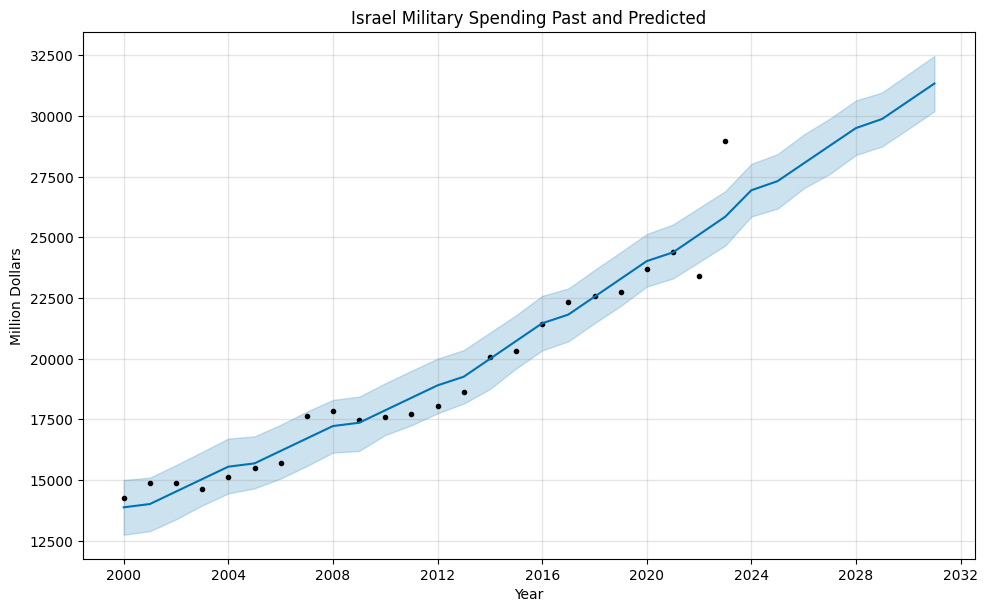

In [ ]:
fig1 = model.plot(forecast, xlabel= "Year", ylabel= "Million Dollars")
fig1.gca().set_title("Israel Military Spending Past and Predicted") # Set the title using the axes object

In [ ]:
#Evaluate the Prophet model using training and testing data sets

#split the data by a cut-off date of 2015 for training
cutoff_date = '2015-01-01'
train = Israel_df2[Israel_df2['ds'] < cutoff_date]
test = Israel_df2[Israel_df2['ds'] >= cutoff_date]


In [ ]:
#Fit the Prophet model on the training dataset
model_2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False) #add regressors if needed
model_2.fit(train[['ds', 'y']])


INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/kdo4izrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/71414cji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14177', 'data', 'file=/tmp/tmpstqtgt6o/kdo4izrc.json', 'init=/tmp/tmpstqtgt6o/71414cji.json', 'output', 'file=/tmp/tmpstqtgt6o/prophet_modelqk6xs116/prophet_model-20241206003541.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:35:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:35:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forecast on the Test Period

#create a future dataframe and generate future dates that match the test period
# Make predictions on the test period; named forecast_2 to keep separate from
# Prophet simulation above
forecast_2 = model_2.predict(test[['ds']]) #This line is added to predict values and store them in forecast dataframe

In [ ]:
#Evaluate the Model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_2['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

#Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_2['yhat']))
print(f"Root Mean Squared Error (MSE): {rmse}")

#Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['y'], forecast_2['yhat']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 2139.7329276467917
Root Mean Squared Error (MSE): 2640.699224022624
Mean Absolute Percentage Error (MAPE): 8.71%


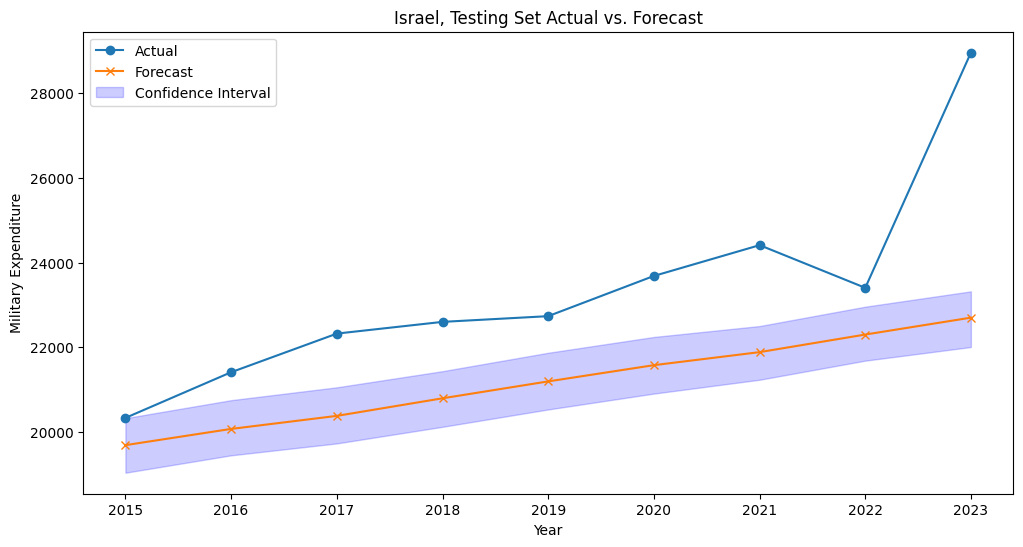

In [ ]:
#Visualize Results of Training and Testing

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker = 'o')
plt.plot(forecast_2['ds'], forecast_2['yhat'], label='Forecast', marker = 'x')
plt.fill_between(
    forecast_2['ds'],
    forecast_2['yhat_lower'],
    forecast_2['yhat_upper'],
    color='blue', alpha=0.2, label='Confidence Interval'
)
plt.xlabel('Year')
plt.ylabel('Military Expenditure')
plt.title('Israel, Testing Set Actual vs. Forecast')
plt.legend()
plt.show()


In [ ]:
#evaluate the Prophet model using cross-validation function
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '5110 days', period = '365 days', horizon = '365 days',)


INFO:prophet:Making 9 forecasts with cutoffs between 2014-01-03 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/xjd6yafc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/tssqss80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41754', 'data', 'file=/tmp/tmpstqtgt6o/xjd6yafc.json', 'init=/tmp/tmpstqtgt6o/tssqss80.json', 'output', 'file=/tmp/tmpstqtgt6o/prophet_modelzegkr3um/prophet_model-20241206003135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:31:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstqtgt6o/ypumv214.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
#show forcasts
#:There are 9 forecasts with cutoffs between 2014-01-03 and 2022-01-01
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,19692.006800,18988.708459,20320.062045,20335.14527,2014-01-03
1,2016-01-01,20240.209923,19596.934868,20919.459282,21412.68634,2015-01-03
2,2017-01-01,20730.003180,20075.225521,21458.468944,22325.92298,2016-01-03
3,2018-01-01,22277.610210,21663.032237,22905.395487,22602.38635,2017-01-02
4,2019-01-01,23131.060101,22525.346882,23690.800468,22737.20328,2018-01-02
5,2020-01-01,23691.706099,23115.079554,24347.252183,23685.71154,2019-01-02
6,2021-01-01,24287.941279,23738.070506,24856.860089,24413.73661,2020-01-02
7,2022-01-01,24876.604817,24325.282596,25443.858885,23406.07457,2021-01-01
8,2023-01-01,24909.602681,24279.985492,25549.601665,28956.83373,2022-01-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = .5)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,364 days,7.018997e+05,837.794527,580.136830,0.025857,0.015846,0.026508,0.7500
1,365 days,4.815066e+06,2194.325779,1555.923364,0.058401,0.033990,0.060714,0.4375


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Figure(1000x600)


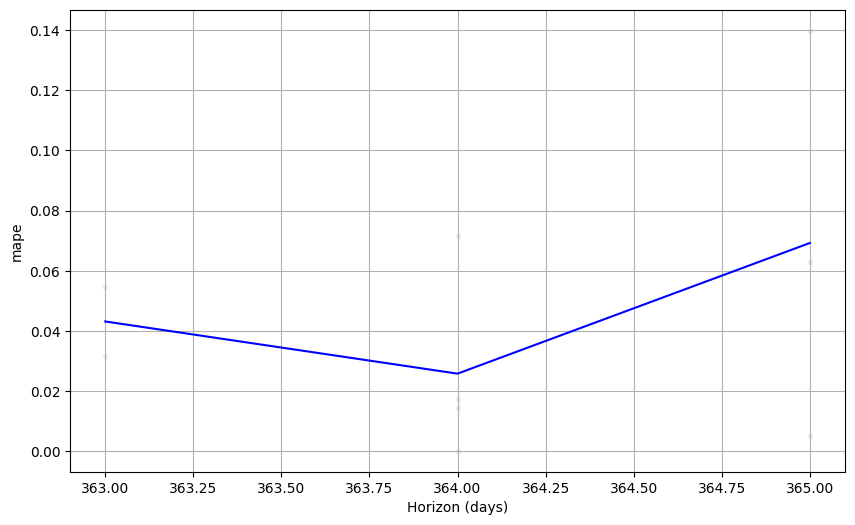

In [ ]:
#Visualize how the forcasting model performed
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
print(fig3)

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.